# Final Project Submission

* Students names: Cody Freese/Fennec Nightingale/Thomas Cornett
* Student pace: Part time
* Instructor name: Amber Yandow
* Blog post URL:

## Table Of Contents
<font size=3rem>
    
0 -**[ INTRO](#INTRODUCTION)<br>**
1 -**[ OBTAIN](#OBTAIN)**<br>
2 -**[ SCRUB](#SCRUB)**<br>
3 -**[ EXPLORE](#EXPLORE)**<br>
4 -**[ MODEL](#MODEL)**<br>
5 -**[ INTERPRET](#INTERPRET)**<br>
6 -**[ CONCLUSIONS & RECCOMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

## Words go here lol

# OBTAIN

## Import tools

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import mlxtend

In [4]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
from math import sin, cos, sqrt, atan2, radians
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import svm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
#set settings 
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## King County dataset

In [7]:
# read data
kc_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 
              'sqft_basement', 'yr_built']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 
             'floors': float, 'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 
             'yr_built': int, 'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float}

kc_data = pd.read_csv(r'~\Documents\Flatiron\data\data\kc_house_data.csv', parse_dates = ['date'], dtype=kc_dtypes)

In [8]:
kc_data['sqft_basement'] = kc_data['sqft_basement'].replace({'?': 0})
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(dtype=float, errors='ignore')
kc_data['sqft_total'] = kc_data['sqft_living']*kc_data['sqft_lot']
kc_data['sqft_habitable'] = (kc_data['sqft_above']+1)*(kc_data['sqft_basement']+1)

In [9]:
#in our search for outliers we found some data that was likely just a typo, let's fix that 
kc_data[kc_data['bedrooms'] == 33] = kc_data[kc_data['bedrooms'] == 33].replace(33,3)

In [10]:
#setting waterfront NaN values equal to the ratio of waterfront/non-waterfront properties, will want to try and narrow by zipcode 
#filling NaN with easily seperatable/changable values helpful 
kc_data = kc_data.fillna(0)

In [11]:
#Convert to integer for whole number year
kc_data['yr_renovated'] = kc_data['yr_renovated'].astype('int')

In [12]:
dumm = pd.get_dummies(kc_data['condition'], prefix='cond', drop_first=True, dtype=int)
kc_data = kc_data.merge(dumm, left_index=True, right_index=True)
dumm = pd.get_dummies(kc_data['view'], prefix='view', drop_first=True, dtype=int)
kc_data = kc_data.merge(dumm, left_index=True, right_index=True)
dumm = pd.get_dummies(kc_data['grade'], prefix='gra', drop_first=True, dtype=int)
kc_data = kc_data.merge(dumm, left_index=True, right_index=True)

In [13]:
kc_data = kc_data.rename({'cond_2.0':'poor', 'cond_3.0':'okay','cond_4.0':'good','cond_5.0':'great'},axis=1)
kc_data = kc_data.rename({'view_1.0': 'view1', 'view_2.0': 'view2', 'view_3.0': 'view3', 'view_4.0':'view4'},axis=1)
kc_data = kc_data.rename({'gra_4': 'D', 'gra_5':'Cmin', 'gra_6':'C',
       'gra_7':'Cpl', 'gra_8':'Bmin', 'gra_9':'B', 'gra_10':'Bpl', 'gra_11':'Amin', 'gra_12':'A', 'gra_13':'Apl'},axis=1)

In [14]:
zips = []

for zipcode in kc_data.zipcode:
    zips.append(zipcode)
    
zips = list(set(zips))
zips.sort()

In [15]:
#would be a bad idea to add 70 dummies to our columns so instead we're binning our zipcodes by 5 
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[0:5],  value= 'zip001t005')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[5:10], value= 'zip006t011')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[10:15], value= 'zip014t024')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[15:20], value= 'zip027t031')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[20:25], value= 'zip032t039')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[25:30], value= 'zip040t053')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[30:35], value= 'zip055t065')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[35:40], value= 'zip070t077')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[40:45], value= 'zip092t106')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[45:50], value= 'zip107t115')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[50:55], value= 'zip116t122')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[55:60], value= 'zip125t144')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[60:65], value= 'zip146t168')
kc_data['zipcode'] = kc_data.zipcode.replace(to_replace = zips[65:70], value= 'zip177t199')

In [16]:
years = []

for year in kc_data.yr_built:
    years.append(year)
    
years = list(set(years))
years.sort()

In [17]:
#gonna do the same for year built by 20 years, will give us 6 new columns, may be illuminating 
kc_data['yr_built'] = kc_data.yr_built.replace(to_replace = years[0:20], value= 'thru20')
kc_data['yr_built'] = kc_data.yr_built.replace(to_replace = years[20:40], value= 'thru40')
kc_data['yr_built'] = kc_data.yr_built.replace(to_replace = years[40:60], value= 'thru60')
kc_data['yr_built'] = kc_data.yr_built.replace(to_replace = years[60:80], value= 'thru80')
kc_data['yr_built'] = kc_data.yr_built.replace(to_replace = years[80:100], value= 'thru2000')
kc_data['yr_built'] = kc_data.yr_built.replace(to_replace = years[100:120], value= 'thru2020')

In [18]:
dumm = pd.get_dummies(kc_data['zipcode'], prefix=None, drop_first=True)
kc_data = kc_data.merge(dumm, left_index=True, right_index=True)
dumm = pd.get_dummies(kc_data['yr_built'], prefix=None, drop_first=True)
kc_data = kc_data.merge(dumm, left_index=True, right_index=True)

In [19]:
kc_data =  kc_data.loc[kc_data['bathrooms'] >= 1]
kc_data =  kc_data.loc[kc_data['bedrooms'] <= 7]
#drop unnessecary columns and fix data
to_drop = ['sqft_living','sqft_lot','id','date','sqft_above','sqft_basement', 'yr_built', 'condition', 'grade',
           'zipcode']
kc_data = kc_data.drop(labels=to_drop,axis=1)
kc_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_total', 'sqft_habitable', 'poor', 'okay', 'good', 'great', 'view1', 'view2', 'view3', 'view4', 'D', 'Cmin', 'C', 'Cpl', 'Bmin', 'B', 'Bpl', 'Amin', 'A', 'Apl', 'zip006t011', 'zip014t024', 'zip027t031', 'zip032t039', 'zip040t053', 'zip055t065', 'zip070t077', 'zip092t106', 'zip107t115', 'zip116t122', 'zip125t144', 'zip146t168', 'zip177t199', 'thru2000', 'thru2020', 'thru40', 'thru60', 'thru80'], dtype='object')

In [20]:
kc_data = kc_data[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_renovated',
                   'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_total', 'sqft_habitable', 
                   'poor', 'okay', 'good', 'great', 
                   'view1', 'view2', 'view3', 'view4', 
                   'D', 'Cmin', 'C', 'Cpl', 'Bmin', 'B', 'Bpl', 'Amin', 'A', 'Apl', 
                   'zip006t011', 'zip014t024', 'zip027t031', 'zip032t039', 'zip040t053', 
                   'zip055t065', 'zip070t077', 'zip092t106', 'zip107t115', 'zip116t122', 
                   'zip125t144', 'zip146t168', 'zip177t199', 'thru2000', 
                   'thru2020', 'thru40', 'thru60', 'thru80']].copy()

In [21]:
kc_data.describe()

,price,bedrooms,bathrooms,floors,waterfront,view,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_total,sqft_habitable,poor,okay,good,great,view1,view2,view3,view4,D,Cmin,C,Cpl,Bmin,B,Bpl,Amin,A,Apl,zip006t011,zip014t024,zip027t031,zip032t039,zip040t053,zip055t065,zip070t077,zip092t106,zip107t115,zip116t122,zip125t144,zip146t168,zip177t199,thru2000,thru2020,thru40,thru60,thru80
count,2.149900e+04,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,2.149900e+04,2.149900e+04,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.00000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.000000,21499.00000,21499.000000,21499.000000
mean,5.406849e+05,3.371227,2.118901,1.495163,0.006558,0.232662,68.608261,47.560084,-122.213901,1988.227778,12751.887902,3.569641e+07,4.936448e+05,0.007675,0.649705,0.262710,0.078608,0.015257,0.044188,0.023536,0.014605,0.000651,0.010559,0.093493,0.416019,0.281827,0.121541,0.052700,0.018512,0.004093,0.000605,0.056468,0.051909,0.071817,0.080748,0.09419,0.088283,0.064189,0.074794,0.065259,0.086376,0.086097,0.060514,0.057956,0.209638,0.221080,0.07926,0.194149,0.229313
std,3.668306e+05,0.883487,0.763481,0.539706,0.080720,0.763815,363.656813,0.138606,0.140411,684.936704,27297.652018,1.083524e+08,1.036945e+06,0.087271,0.477073,0.440116,0.269133,0.122574,0.205518,0.151602,0.119970,0.025511,0.102214,0.291128,0.492908,0.449900,0.326762,0.223439,0.134798,0.063849,0.024583,0.230828,0.221849,0.258191,0.272454,0.29210,0.283713,0.245095,0.263065,0.246988,0.280925,0.280514,0.238443,0.233666,0.407059,0.414984,0.27015,0.395553,0.420401
min,7.800000e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,-1.965487e+09,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.230000e+05,3.000000,1.750000,1.000000,0.000000,0.000000,0.000000,47.470850,-122.328000,1490.000000,5100.000000,8.412130e+06,1.561000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,0.000000,47.571900,-122.230000,1840.000000,7620.000000,1.417926e+07,2.671000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,0.000000,47.678100,-122.125000,2370.000000,10080.000000,2.462895e+07,6.984310e+05,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,7.700000e+06,7.000000,8.000000,3.500000,1.000000,4.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2.146767e+09,3.887684e+07,1.000000,1.000000,1.000000,1.000000,

## Load Schools Info 

In [22]:
schools = pd.read_csv(r'~\Documents\Flatiron\data\data\Schools.csv')
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           642 non-null    float64
 1   Y           642 non-null    float64
 2   OBJECTID    642 non-null    int64  
 3   FEATURE_ID  642 non-null    int64  
 4   ESITE       642 non-null    int64  
 5   CODE        642 non-null    int64  
 6   NAME        642 non-null    object 
 7   ABB_NAME    642 non-null    object 
 8   ADDRESS     642 non-null    object 
 9   ZIPCODE     642 non-null    int64  
 10  LONG_CEN    642 non-null    float64
 11  LAT_CEN     642 non-null    float64
 12  SCH_CLASS   641 non-null    float64
 13  DISTRICT    641 non-null    object 
 14  PIN         641 non-null    float64
 15  MAJOR       641 non-null    float64
 16  MINOR       641 non-null    float64
 17  FEATUREDES  642 non-null    object 
 18  OSPI_CODE   606 non-null    float64
dtypes: float64(9), int64(5), obje

In [23]:
type(schools['LAT_CEN'].iloc[2])

numpy.float64

In [24]:
#calculate distance between schools and data 
kc = {}
kc3 = {}
kc5 = {}
# approximate radius of earth in miles  miles
i = 0
while i <= 21498:
    R = 3963.0
    k = 0
    lat1 = radians(kc_data['lat'].iloc[i])
    lon1 = radians(kc_data['long'].iloc[i])
    distance = []
    
    while k <= 641:
        lat2 = radians(schools['LAT_CEN'].iloc[k])
        lon2 = radians(schools['LONG_CEN'].iloc[k])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance.append(R * c)
        
        k += 1 
        
    distance.sort()
    kc[i] = distance[0:1]
    kc3[i] = sum(distance[0:3])
    kc5[i] = sum(distance[0:5])
    i += 1

In [25]:
kc1 = pd.DataFrame.from_dict(kc, orient='index', columns=['mi_nearest_scl'])
kc3 = pd.DataFrame.from_dict(kc3, orient='index', columns=['mi_3_scls'])
kc5 = pd.DataFrame.from_dict(kc5, orient='index', columns=['mi_5_scls'])

In [26]:
kc_data = kc_data.merge(kc1, left_index=True, right_index=True)
kc_data = kc_data.merge(kc3, left_index=True, right_index=True)
kc_data = kc_data.merge(kc5, left_index=True, right_index=True)

## Check for NaN

In [27]:
kc_data.isna().sum()

price             0
bedrooms          0
bathrooms         0
floors            0
waterfront        0
view              0
yr_renovated      0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
sqft_total        0
sqft_habitable    0
poor              0
okay              0
good              0
great             0
view1             0
view2             0
view3             0
view4             0
D                 0
Cmin              0
C                 0
Cpl               0
Bmin              0
B                 0
Bpl               0
Amin              0
A                 0
Apl               0
zip006t011        0
zip014t024        0
zip027t031        0
zip032t039        0
zip040t053        0
zip055t065        0
zip070t077        0
zip092t106        0
zip107t115        0
zip116t122        0
zip125t144        0
zip146t168        0
zip177t199        0
thru2000          0
thru2020          0
thru40            0
thru60            0
thru80            0
mi_nearest_scl    0


## For Loop - Value Counts

In [28]:
for col in kc_data.columns:
    try:
        print(col, kc_data[col].value_counts()[:5])
    except:
        print(col, kc_data[col].value_counts())
    print('\n')

price 450000.0    171
350000.0    170
550000.0    158
500000.0    152
425000.0    150
           ... 
575575.0      1
837700.0      1
575550.0      1
873000.0      1
884744.0      1
Name: price, Length: 3600, dtype: int64


bedrooms 3    9766
4    6850
2    2721
5    1591
6     271
Name: bedrooms, dtype: int64


bathrooms 2.50    5340
1.00    3850
1.75    3045
2.25    2038
2.00    1923
1.50    1441
2.75    1175
3.00     741
3.50     722
3.25     581
3.75     151
4.00     130
4.50      96
4.25      79
4.75      23
5.00      20
Name: bathrooms, dtype: int64


floors 1.0    10598
2.0     8144
1.5     1903
3.0      593
2.5      159
3.5        6
Name: floors, dtype: int64


waterfront 0.0    21263
1.0      140
Name: waterfront, dtype: int64


view 0.0    19314
2.0      944
3.0      504
1.0      328
4.0      313
Name: view, dtype: int64


yr_renovated 0       20664
2014       73
2013       31
2003       31
2007       30
Name: yr_renovated, dtype: int64


lat 47.5491    17
47.6846    17
47.66

## Drop Condition Has No Values Present

## Summary

In [29]:
kc_data.describe().round(3)

,price,bedrooms,bathrooms,floors,waterfront,view,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_total,sqft_habitable,poor,okay,good,great,view1,view2,view3,view4,D,Cmin,C,Cpl,Bmin,B,Bpl,Amin,A,Apl,zip006t011,zip014t024,zip027t031,zip032t039,zip040t053,zip055t065,zip070t077,zip092t106,zip107t115,zip116t122,zip125t144,zip146t168,zip177t199,thru2000,thru2020,thru40,thru60,thru80,mi_nearest_scl,mi_3_scls,mi_5_scls
count,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,2.140300e+04,2.140300e+04,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000,21403.000
mean,540100.168,3.371,2.116,1.492,0.007,0.233,68.916,47.560,-122.214,1987.411,12769.968,3.574061e+07,4.937459e+05,0.008,0.648,0.264,0.079,0.015,0.044,0.024,0.015,0.001,0.011,0.094,0.417,0.281,0.121,0.052,0.018,0.004,0.001,0.057,0.052,0.072,0.081,0.094,0.088,0.064,0.075,0.065,0.086,0.086,0.061,0.058,0.211,0.218,0.080,0.195,0.230,0.484,2.186,4.600
std,365893.440,0.883,0.763,0.538,0.081,0.764,364.442,0.139,0.140,683.368,27324.528,1.084957e+08,1.036401e+06,0.087,0.478,0.441,0.270,0.123,0.205,0.152,0.120,0.026,0.102,0.292,0.493,0.450,0.326,0.223,0.134,0.064,0.025,0.231,0.222,0.258,0.273,0.292,0.283,0.245,0.263,0.247,0.281,0.280,0.239,0.234,0.408,0.413,0.271,0.396,0.421,0.460,1.908,3.651
min,78000.000,1.000,1.000,1.000,0.000,0.000,0.000,47.156,-122.519,399.000,651.000,-1.965487e+09,3.910000e+02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.119,0.490
25%,322000.000,3.000,1.750,1.000,0.000,0.000,0.000,47.470,-122.328,1490.000,5100.000,8.434275e+06,1.555500e+03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.245,1.341,2.921
50%,450000.000,3.000,2.250,1.500,0.000,0.000,0.000,47.572,-122.230,1840.000,7625.000,1.419840e+07,2.671000e+03,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.381,1.815,3.886
75%,645000.000,4.000,2.500,2.000,0.000,0.000,0.000,47.678,-122.125,2360.000,10081.500,2.464328e+07,7.015960e+05,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.575,2.489,5.180
max,7700000.000,7.000,8.000,3.500,1.000,4.000,2015.000,47.778,-121.315,6210.000,871200.000,2.146767e+09,3.887684e+07,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,16.615,52.953,105.823


# EXPLORE

## Histogram

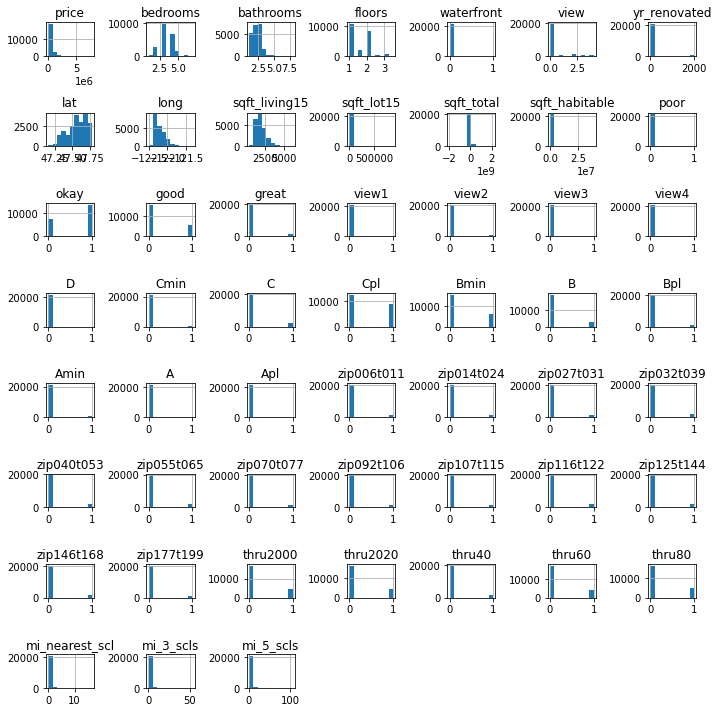

In [30]:
kc_data.hist(figsize=(10,10))
plt.tight_layout()

## Scatter Matrix

In [31]:
# fig = pd.plotting.scatter_matrix(kc_data,figsize=(16,16));
# print(type(fig))

## Heatmap

Text(0.5, 1.0, 'Correlations')

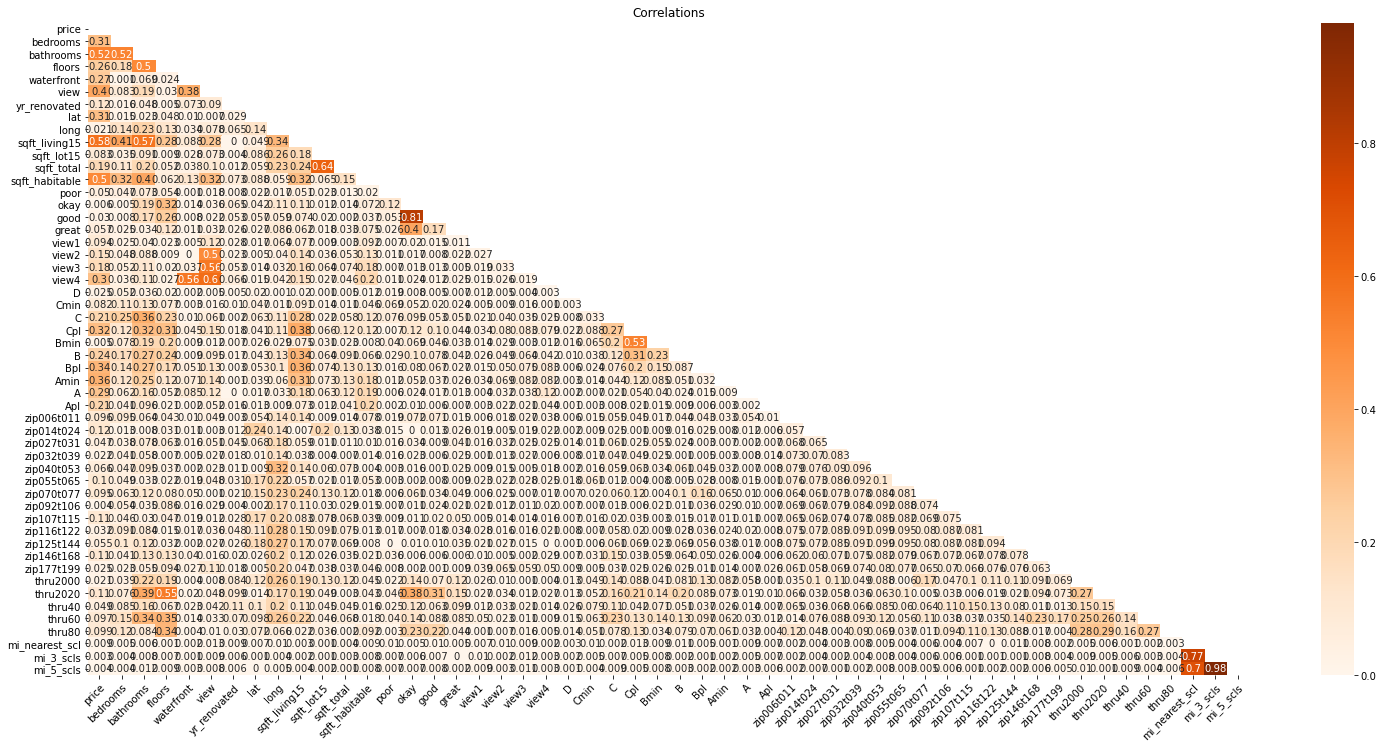

In [32]:
fig, ax = plt.subplots(figsize=(26,12))

corr = kc_data.corr().abs().round(3)

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask, cmap='Oranges', ax=ax)
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="right",
         rotation_mode="anchor")
ax.set_title('Correlations')

# MODEL

## Initial Model on Price

In [33]:
outcome = 'price'
x_cols = [ 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_renovated', 
          'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_total', 'sqft_habitable', 
          'poor', 'okay', 'good', 'great', 'view1', 'view2', 'view3', 'view4',
          'D', 'Cmin', 'C', 'Cpl', 'Bmin', 'B', 'Bpl', 'Amin', 'A', 'Apl', 
          'zip006t011', 'zip014t024', 'zip027t031', 'zip032t039', 
          'zip040t053', 'zip055t065', 'zip070t077', 'zip092t106', 
          'zip107t115', 'zip116t122', 'zip125t144', 'zip146t168', 
          'zip177t199', 
          'thru2000', 'thru2020', 'thru40', 'thru60', 'thru80',
          'mi_nearest_scl', 'mi_3_scls', 'mi_5_scls']

In [34]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1271.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:24:58   Log-Likelihood:            -2.8994e+05
No. Observations:               21403   AIC:                         5.800e+05
Df Residuals:                   21353   BIC:                         5.804e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.797e+07   1.65e+06    -16.981      0.000   -3.12e+07   -2.47e+07
bedrooms        6519.6704   1811.900      3.598      0.000    2968.210    1.01e+04
bathrooms       5.737e+04   2935.886     19.542      0.000    5.16e+04    6.31e+04
floors          2.677e+04   3560.265      7.519      0.000    1.98e+04    3.37e+04
waterfront      6.156e+05   1.92e+04     32.031      0.000    5.78e+05    6.53e+05
view            4.874e+04   2139.306     22.781      0.000    4.45e+04    5.29e+04
yr_renovated      40.8095      3.700     11.029      0.000      33.556      48.062
lat             5.916e+05   1.08e+04     54.533      0.000     5.7e+05    6.13e+05
long           -2.713e+04   1.41e+04     -1.922      0.055   -5.48e+04     534.538
sqft_living15     78.5379      3.055     25.709      0.000      72.550      84.526
sqft_lot15         0.0279      0.062      0.449      0.653      -0.094       0.150
sqft_total      4.372e-05   1.57e-05      2.785      0.005    1.29e-05    7.45e-05
sqft_habitable     0.0509      0.002     32.415      0.000       0.048       0.054
poor            6.237e+04    3.8e+04      1.641      0.101   -1.21e+04    1.37e+05
okay            6.903e+04   3.54e+04      1.952      0.051    -280.816    1.38e+05
good            1.126e+05   3.54e+04      3.184      0.001    4.33e+04    1.82e+05
great           1.489e+05   3.56e+04      4.186      0.000    7.92e+04    2.19e+05
view1           6.034e+04   1.02e+04      5.919      0.000    4.04e+04    8.03e+04
view2          -3.296e+04   6465.181     -5.098      0.000   -4.56e+04   -2.03e+04
view3          -2.706e+04   7719.678     -3.505      0.000   -4.22e+04   -1.19e+04
view4           3.385e+04   7171.037      4.721      0.000    1.98e+04    4.79e+04
D              -3.363e+06    1.7e+05    -19.748      0.000    -3.7e+06   -3.03e+06
Cmin           -3.353e+06   1.64e+05    -20.404      0.000   -3.68e+06   -3.03e+06
C              -3.315e+06   1.64e+05    -20.173      0.000   -3.64e+06   -2.99e+06
Cpl            -3.269e+06   1.65e+05    -19.861      0.000   -3.59e+06   -2.95e+06
Bmin           -3.194e+06   1.65e+05    -19.368      0.000   -3.52e+06   -2.87e+06
B              -3.043e+06   1.65e+05    -18.443      0.000   -3.37e+06   -2.72e+06
Bpl            -2.843e+06   1.65e+05    -17.206      0.000   -3.17e+06   -2.52e+06
Amin           -2.566e+06   1.66e+05    -15.482      0.000   -2.89e+06   -2.24e+06
A              -2.104e+06   1.66e+05    -12.642      0.000   -2.43e+06   -1.78e+06
Apl            -9.167e+05   1.72e+05     -5.315      0.000   -1.25e+06   -5.79e+05
zip006t011     -1.189e+05   7774.822    -15.291      0.000   -1.34e+05   -1.04e+05
zip014t024     -1.537e+05   7808.204    -19.686      0.000   -1.69e+05   -1.38e+05
zip027t031     -1.542e+05   7282.308    -21.170      0.000   -1.68e+05    -1.4e+05
zip032t039  

## Regression Results

In [35]:
model.params.sort_values()

Intercept        -2.796782e+07
D                -3.363221e+06
Cmin             -3.353290e+06
C                -3.314919e+06
Cpl              -3.269385e+06
Bmin             -3.193689e+06
B                -3.043369e+06
Bpl              -2.843284e+06
Amin             -2.565953e+06
A                -2.103999e+06
Apl              -9.167121e+05
zip146t168       -2.121372e+05
zip070t077       -1.896640e+05
zip125t144       -1.694455e+05
zip177t199       -1.694386e+05
thru2000         -1.641338e+05
zip055t065       -1.628025e+05
zip027t031       -1.541690e+05
zip014t024       -1.537114e+05
thru2020         -1.418613e+05
thru80           -1.325520e+05
zip006t011       -1.188825e+05
zip092t106       -9.853916e+04
zip116t122       -9.728442e+04
zip040t053       -8.842576e+04
zip032t039       -8.465373e+04
thru60           -5.661596e+04
zip107t115       -4.655833e+04
view2            -3.296224e+04
long             -2.712795e+04
view3            -2.705680e+04
thru40           -1.398486e+04
mi_3_scl

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     57.62
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:24:58   Log-Likelihood:                -53654.
No. Observations:                4512   AIC:                         1.074e+05
Df Residuals:                    4469   BIC:                         1.077e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms        4336.8105    842.542      5.147      0.000    2685.010    5988.611
bathrooms       1.638e+04   1452.131     11.279      0.000    1.35e+04    1.92e+04
floors          2792.5289   1847.585      1.511      0.131    -829.653    6414.711
waterfront     -3.198e+04   5.22e+04     -0.613      0.540   -1.34e+05    7.03e+04
view            1.527e+04   4923.817      3.100      0.002    5612.280    2.49e+04
yr_renovated       3.4764      1.928      1.803      0.071      -0.303       7.256
lat             9.578e+04   6348.320     15.087      0.000    8.33e+04    1.08e+05
long            1.414e+04   5623.457      2.515      0.012    3120.225    2.52e+04
sqft_living15     18.6502      1.809     10.311      0.000      15.104      22.196
sqft_lot15        -0.0238      0.039     -0.605      0.545      -0.101       0.053
sqft_total      8.986e-05   2.19e-05      4.101      0.000    4.69e-05       0.000
sqft_habitable     0.0098      0.002      5.291      0.000       0.006       0.013
poor            2.459e+04   1.03e+04      2.377      0.017    4313.231    4.49e+04
okay            5.451e+04   9713.246      5.612      0.000    3.55e+04    7.36e+04
good            6.372e+04   9751.395      6.534      0.000    4.46e+04    8.28e+04
great           7.028e+04   9929.415      7.078      0.000    5.08e+04    8.97e+04
view1           1.031e+04   1.11e+04      0.927      0.354   -1.15e+04    3.21e+04
view2          -1.051e+04   1.08e+04     -0.976      0.329   -3.16e+04    1.06e+04
view3          -2.743e+04   1.62e+04     -1.691      0.091   -5.92e+04    4375.733
view4           2.705e+04   1.85e+04      1.463      0.144   -9199.955    6.33e+04
D               -2.76e+06   7.74e+05     -3.565      0.000   -4.28e+06   -1.24e+06
Cmin           -2.746e+06   7.74e+05     -3.547      0.000   -4.26e+06   -1.23e+06
C              -2.723e+06   7.74e+05     -3.517      0.000   -4.24e+06    -1.2e+06
Cpl            -2.709e+06   7.74e+05     -3.498      0.000   -4.23e+06   -1.19e+06
Bmin           -2.701e+06   7.74e+05     -3.488      0.000   -4.22e+06   -1.18e+06
B              -2.707e+06   7.75e+05     -3.495      0.000   -4.23e+06   -1.19e+06
Bpl             4.529e-08   1.29e-08      3.514      0.000       2e-08    7.06e-08
Amin            2.547e-07   7.24e-08      3.519      0.000    1.13e-07    3.97e-07
A              -1.281e-07   3.64e-08     -3.521      0.000   -1.99e-07   -5.68e-08
Apl             3.771e-08   1.07e-08      3.524      0.000    1.67e-08    5.87e-08
zip006t011      6312.7134   5551.017      1.137      0.256   -4570.027    1.72e+04
zip014t024      3024.5254   2154.136      1.404      0.160   -1198.648    7247.698
zip027t031      3566.3023   2527.835      1.411      0.158   -1389.506    8522.110
zip032t039      4903.8547   2613.784      1.876      0.061    -220.456       1e+04
zip040t053  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              9436.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:24:58   Log-Likelihood:                     -1.7955e+05
No. Observations:               13977   AIC:                                  3.592e+05
Df Residuals:                   13932   BIC:                                  3.595e+05
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms        6808.5533   1115.991      6.101      0.000    4621.061    8996.046
bathrooms       2.647e+04   1915.909     13.817      0.000    2.27e+04    3.02e+04
floors          9286.5155   2211.656      4.199      0.000    4951.372    1.36e+04
waterfront      1.112e+05   1.97e+04      5.634      0.000    7.25e+04     1.5e+05
view            2.114e+04   1817.076     11.631      0.000    1.76e+04    2.47e+04
yr_renovated       9.8907      2.476      3.995      0.000       5.038      14.744
lat             3.815e+05   7101.021     53.726      0.000    3.68e+05    3.95e+05
long            6.616e+04   9017.291      7.337      0.000    4.85e+04    8.38e+04
sqft_living15     59.3512      2.076     28.588      0.000      55.282      63.421
sqft_lot15         0.1688      0.042      4.051      0.000       0.087       0.250
sqft_total      8.716e-05   1.17e-05      7.439      0.000    6.42e-05       0.000
sqft_habitable     0.0107      0.001      7.722      0.000       0.008       0.013
poor            1.366e+04   2.89e+04      0.473      0.636   -4.29e+04    7.03e+04
okay            1.612e+04   2.68e+04      0.600      0.548   -3.65e+04    6.87e+04
good            3.976e+04   2.68e+04      1.481      0.139   -1.29e+04    9.24e+04
great           6.423e+04    2.7e+04      2.383      0.017    1.14e+04    1.17e+05
view1           3.256e+04   6631.592      4.911      0.000    1.96e+04    4.56e+04
view2            184.6582   4846.081      0.038      0.970   -9314.312    9683.628
view3          -3775.4343   6382.164     -0.592      0.554   -1.63e+04    8734.464
view4           -222.0305   6488.607     -0.034      0.973   -1.29e+04    1.25e+04
D              -9.788e+06   1.15e+06     -8.520      0.000    -1.2e+07   -7.54e+06
Cmin           -9.774e+06   1.15e+06     -8.533      0.000    -1.2e+07   -7.53e+06
C              -9.792e+06   1.15e+06     -8.548      0.000    -1.2e+07   -7.55e+06
Cpl            -9.739e+06   1.15e+06     -8.501      0.000    -1.2e+07   -7.49e+06
Bmin           -9.681e+06   1.15e+06     -8.450      0.000   -1.19e+07   -7.43e+06
B              -9.611e+06   1.15e+06     -8.389      0.000   -1.19e+07   -7.37e+06
Bpl            -9.563e+06   1.15e+06     -8.346      0.000   -1.18e+07   -7.32e+06
Amin           -9.544e+06   1.15e+06     -8.326      0.000   -1.18e+07    -7.3e+06
A               1.937e-06   2.29e-07      8.454      0.000    1.49e-06    2.39e-06
Apl            -5.651e-07   6.69e-08     -8.453      0.000   -6.96e-07   -4.34e-07
zip006t011     -1.327e+04   5907.791     -2.246      0.025   -2.48e+04   -1686.635
zip014t024      -1.13e+05   6496.923    -17.388      0.000   -1.26e+05      -1e+05
zip027t031     -5.217e+04   5747.305     -9.078      0.000   -6.34e+04   -4.09e

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     102.2
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:24:58   Log-Likelihood:                -41208.
No. Observations:                2914   AIC:                         8.251e+04
Df Residuals:                    2866   BIC:                         8.280e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms       -2640.0287   8640.704     -0.306      0.760   -1.96e+04    1.43e+04
bathrooms       1.045e+05   1.15e+04      9.082      0.000    8.19e+04    1.27e+05
floors           4.26e+04    1.7e+04      2.511      0.012    9328.773    7.59e+04
waterfront      6.983e+05   4.19e+04     16.666      0.000    6.16e+05     7.8e+05
view            4.333e+04   5862.075      7.392      0.000    3.18e+04    5.48e+04
yr_renovated      41.7899     13.147      3.179      0.001      16.012      67.568
lat             1.527e+05   1.15e+05      1.323      0.186   -7.36e+04    3.79e+05
long            -1.08e+06   1.15e+05     -9.415      0.000    -1.3e+06   -8.55e+05
sqft_living15    100.9129     11.015      9.161      0.000      79.314     122.512
sqft_lot15        -0.1772      0.228     -0.776      0.438      -0.625       0.271
sqft_total      6.009e-05   4.14e-05      1.452      0.146    -2.1e-05       0.000
sqft_habitable     0.0447      0.004     11.813      0.000       0.037       0.052
poor           -4.563e+05   3.72e+05     -1.225      0.221   -1.19e+06    2.74e+05
okay           -4.434e+05   3.39e+05     -1.306      0.192   -1.11e+06    2.22e+05
good            -3.61e+05   3.39e+05     -1.064      0.287   -1.03e+06    3.04e+05
great          -3.578e+05    3.4e+05     -1.053      0.292   -1.02e+06    3.08e+05
view1           4.332e+04   3.13e+04      1.383      0.167   -1.81e+04    1.05e+05
view2          -3.738e+04   1.85e+04     -2.020      0.043   -7.37e+04   -1093.171
view3          -2.417e+04   1.91e+04     -1.268      0.205   -6.15e+04    1.32e+04
view4           3.682e+04    1.7e+04      2.170      0.030    3543.754    7.01e+04
D              -2.359e-05   2.63e-06     -8.966      0.000   -2.87e-05   -1.84e-05
Cmin            8.551e-06   9.53e-07      8.971      0.000    6.68e-06    1.04e-05
C              -1.382e+08   1.54e+07     -9.001      0.000   -1.68e+08   -1.08e+08
Cpl            -1.383e+08   1.54e+07     -9.002      0.000   -1.68e+08   -1.08e+08
Bmin           -1.382e+08   1.54e+07     -8.997      0.000   -1.68e+08   -1.08e+08
B              -1.381e+08   1.54e+07     -8.990      0.000   -1.68e+08   -1.08e+08
Bpl            -1.379e+08   1.54e+07     -8.978      0.000   -1.68e+08   -1.08e+08
Amin           -1.377e+08   1.54e+07     -8.964      0.000   -1.68e+08   -1.08e+08
A              -1.373e+08   1.54e+07     -8.938      0.000   -1.67e+08   -1.07e+08
Apl            -1.362e+08   1.54e+07     -8.865      0.000   -1.66e+08   -1.06e+08
zip006t011     -3.526e+05   3.04e+04    -11.580      0.000   -4.12e+05   -2.93e+05
zip014t024     -2.504e+05   8.05e+04     -3.110      0.002   -4.08e+05   -9.25e+04
zip027t031     -4.132e+05   4.29e+04     -9.633      0.000   -4.97e+05   -3.29e+05
zip032t039     -1.199e+05      3e+04     -4.000      0.000   -1.79e+05   -6.11e+04
zip040t053  

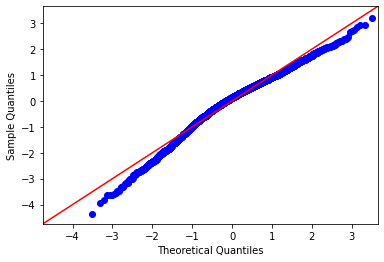

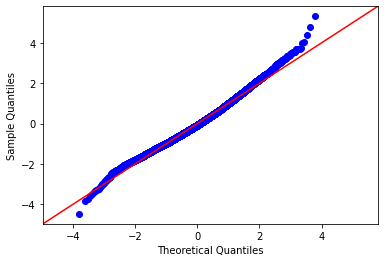

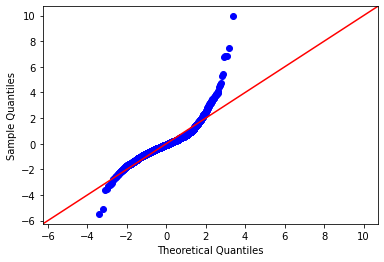

In [36]:
lowtier = kc_data[kc_data.price <=300000]
midtier = kc_data[(kc_data.price > 300001) & (kc_data.price<=800000) ]
hightier = kc_data[kc_data.price >800000]

lowincome = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_renovated',
           'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_total', 'sqft_habitable', 
           'poor', 'okay', 'good', 'great', 
           'view1', 'view2', 'view3', 'view4', 
           'D', 'Cmin', 'C', 'Cpl', 'Bmin', 'B', 'Bpl', 'Amin', 'A', 'Apl', 
           'zip006t011', 'zip014t024', 'zip027t031', 'zip032t039', 'zip040t053', 
           'zip055t065', 'zip070t077', 'zip092t106', 'zip107t115', 'zip116t122', 
           'zip125t144', 'zip146t168', 'zip177t199', 'thru2000', 
           'thru2020', 'thru40', 'thru60', 'thru80']

mediumincome = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_renovated',
           'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_total', 'sqft_habitable', 
           'poor', 'okay', 'good', 'great', 
           'view1', 'view2', 'view3', 'view4', 
           'D', 'Cmin', 'C', 'Cpl', 'Bmin', 'B', 'Bpl', 'Amin', 'A', 'Apl', 
           'zip006t011', 'zip014t024', 'zip027t031', 'zip032t039', 'zip040t053', 
           'zip055t065', 'zip070t077', 'zip092t106', 'zip107t115', 'zip116t122', 
           'zip125t144', 'zip146t168', 'zip177t199', 'thru2000', 
           'thru2020', 'thru40', 'thru60', 'thru80']

highincome = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'yr_renovated',
           'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_total', 'sqft_habitable', 
           'poor', 'okay', 'good', 'great', 
           'view1', 'view2', 'view3', 'view4', 
           'D', 'Cmin', 'C', 'Cpl', 'Bmin', 'B', 'Bpl', 'Amin', 'A', 'Apl', 
           'zip006t011', 'zip014t024', 'zip027t031', 'zip032t039', 'zip040t053', 
           'zip055t065', 'zip070t077', 'zip092t106', 'zip107t115', 'zip116t122', 
           'zip125t144', 'zip146t168', 'zip177t199', 'thru2000', 
           'thru2020', 'thru40', 'thru60', 'thru80', 'mi_nearest_scl',	'mi_3_scls', 'mi_5_scls']

def make_ols(df, x_columns, drops=None, target='price', add_constant=False):
    if drops:
        drops.append(target)
        X = df.drop(columns=drops)
    else:
        X = df[x_columns]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X)
    res = ols.fit()
    display(res.summary())
    fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)
    return res
make_ols(lowtier,lowincome)
make_ols(midtier,mediumincome)
make_ols(hightier,highincome)

## Refinement

In [37]:
kc_columns = ['price']

In [38]:
for col in kc_columns:
    col_zscore = str(col + '_zscore')
    kc_data[col_zscore] = (kc_data[col] - kc_data[col].mean())/kc_data[col].std()
    kc_data = kc_data.loc[kc_data[col_zscore] < 2.25]
    kc_data = kc_data.loc[kc_data[col_zscore] > (-2.25)]
    kc_data = kc_data.drop(col_zscore, axis = 1)

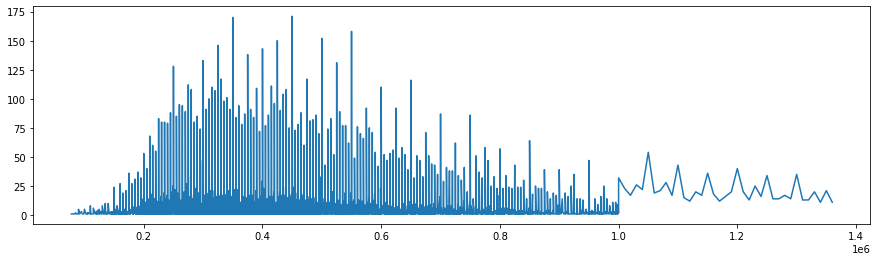

In [39]:
plt.figure(figsize=(15,4))
plt.plot(kc_data['price'].value_counts().sort_index())

In [40]:
for i in range(1,100):
    q = i / 100
    print('{} percentile: {}'.format(q, kc_data['price'].quantile(q=q)))

0.01 percentile: 154648.5
0.02 percentile: 175000.0
0.03 percentile: 190500.0
0.04 percentile: 201000.0
0.05 percentile: 210000.0
0.06 percentile: 219000.0
0.07 percentile: 225000.0
0.08 percentile: 232000.0
0.09 percentile: 239291.0
0.1 percentile: 245000.0
0.11 percentile: 250000.0
0.12 percentile: 254950.0
0.13 percentile: 260000.0
0.14 percentile: 265000.0
0.15 percentile: 269950.0
0.16 percentile: 275000.0
0.17 percentile: 279490.25
0.18 percentile: 284000.0
0.19 percentile: 289950.0
0.2 percentile: 294979.4
0.21 percentile: 299950.0
0.22 percentile: 303000.0
0.23 percentile: 309000.0
0.24 percentile: 314000.0
0.25 percentile: 319000.0
0.26 percentile: 324000.0
0.27 percentile: 327000.0
0.28 percentile: 330000.0
0.29 percentile: 335928.5
0.3 percentile: 340000.0
0.31 percentile: 346000.0
0.32 percentile: 350000.0
0.33 percentile: 355000.0
0.34 percentile: 360000.0
0.35 percentile: 365000.0
0.36 percentile: 370000.0
0.37 percentile: 375000.0
0.38 percentile: 380000.0
0.39 percentil

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.642e+04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:24:59   Log-Likelihood:                         -63677.
No. Observations:                5417   AIC:                                  1.274e+05
Df Residuals:                    5389   BIC:                                  1.276e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms        2191.3754    641.280      3.417      0.001     934.208    3448.543
bathrooms       8581.6477   1046.013      8.204      0.000    6531.040    1.06e+04
floors          4922.6565   1208.069      4.075      0.000    2554.352    7290.961
lat             1.115e+05   3551.583     31.387      0.000    1.05e+05    1.18e+05
long            4.191e+04   1386.031     30.239      0.000    3.92e+04    4.46e+04
sqft_living15     20.8649      1.317     15.842      0.000      18.283      23.447
sqft_total      7.531e-05   1.45e-05      5.206      0.000     4.7e-05       0.000
sqft_habitable     0.0068      0.001      5.605      0.000       0.004       0.009
poor            3.092e+04   1.24e+04      2.488      0.013    6558.452    5.53e+04
okay            3.343e+04   1.18e+04      2.832      0.005    1.03e+04    5.66e+04
good            3.774e+04   1.18e+04      3.193      0.001    1.46e+04    6.09e+04
great           3.903e+04   1.19e+04      3.277      0.001    1.57e+04    6.24e+04
view1           1.767e+04   6267.464      2.819      0.005    5381.937       3e+04
view2           1.014e+04   3385.989      2.995      0.003    3504.543    1.68e+04
view3           2.787e+04   6248.711      4.460      0.000    1.56e+04    4.01e+04
D              -2.897e+04   1.39e+04     -2.079      0.038   -5.63e+04   -1646.292
Cpl             8184.1071   1266.286      6.463      0.000    5701.675    1.07e+04
Bmin            2.446e+04   1783.576     13.714      0.000     2.1e+04     2.8e+04
B               2.812e+04   4389.771      6.405      0.000    1.95e+04    3.67e+04
zip032t039      5787.1328   1630.699      3.549      0.000    2590.303    8983.963
zip055t065      1.015e+04   1393.262      7.283      0.000    7415.981    1.29e+04
zip070t077      2.692e+04   3956.786      6.804      0.000    1.92e+04    3.47e+04
zip092t106      1.198e+04   1665.686      7.193      0.000    8716.218    1.52e+04
zip107t115      1.772e+04   3186.375      5.561      0.000    1.15e+04     2.4e+04
zip116t122      1.988e+04   2239.830      8.875      0.000    1.55e+04    2.43e+04
zip125t144      1.848e+04   1850.515      9.989      0.000    1.49e+04    2.21e+04
zip146t168      9246.4952   1566.844      5.901      0.000    6174.848    1.23e+04
thru80         -5078.3417   1102.164     -4.608      0.000   -7239.030   -2917.654
==============================================================================
Omnibus:                       29.068   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.820
Skew:                          -0.091   Prob(JB):                     6.72e-06
Kurtosis:                       2.731   Cond. No.                     1.94e+09
================

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          3.261e+04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:24:59   Log-Likelihood:                         -62550.
No. Observations:                5261   AIC:                                  1.251e+05
Df Residuals:                    5239   BIC:                                  1.253e+05
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bathrooms       8220.1492   1144.350      7.183      0.000    5976.746    1.05e+04
lat             9.193e+04   4220.770     21.780      0.000    8.37e+04       1e+05
long            3.269e+04   1646.487     19.857      0.000    2.95e+04    3.59e+04
sqft_living15      9.8862      1.315      7.520      0.000       7.309      12.463
sqft_total      4.555e-05   7.39e-06      6.161      0.000    3.11e-05       6e-05
sqft_habitable     0.0052      0.001      5.325      0.000       0.003       0.007
view2            1.15e+04   3061.289      3.755      0.000    5495.082    1.75e+04
Cpl             8330.3344   1910.474      4.360      0.000    4585.009    1.21e+04
Bmin            1.525e+04   2219.298      6.869      0.000    1.09e+04    1.96e+04
B               3.097e+04   3124.313      9.912      0.000    2.48e+04    3.71e+04
Bpl              4.96e+04   7900.221      6.279      0.000    3.41e+04    6.51e+04
zip006t011      1.727e+04   2265.560      7.621      0.000    1.28e+04    2.17e+04
zip014t024      -1.28e+04   2571.798     -4.978      0.000   -1.78e+04   -7759.694
zip040t053      6023.2326   1967.088      3.062      0.002    2166.920    9879.545
zip070t077      5866.6652   2532.221      2.317      0.021     902.456    1.08e+04
zip107t115      1.736e+04   2170.743      7.997      0.000    1.31e+04    2.16e+04
zip116t122      1.528e+04   1841.829      8.297      0.000    1.17e+04    1.89e+04
zip146t168     -5322.8792   2106.375     -2.527      0.012   -9452.252   -1193.507
thru2000       -2.496e+04   2219.942    -11.244      0.000   -2.93e+04   -2.06e+04
thru2020       -2.233e+04   2234.493     -9.992      0.000   -2.67e+04   -1.79e+04
thru60         -1.267e+04   1832.568     -6.911      0.000   -1.63e+04   -9072.677
thru80         -2.336e+04   2015.498    -11.591      0.000   -2.73e+04   -1.94e+04
==============================================================================
Omnibus:                      430.252   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.578
Skew:                           0.046   Prob(JB):                     4.91e-31
Kurtosis:                       2.207   Cond. No.                     1.25e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          3.025e+04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:24:59   Log-Likelihood:                         -57476.
No. Observations:                4708   AIC:                                  1.150e+05
Df Residuals:                    4687   BIC:                                  1.151e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms        3777.2400    992.636      3.805      0.000    1831.206    5723.274
bathrooms       5386.0837   1679.645      3.207      0.001    2093.190    8678.978
floors          5555.9106   1887.979      2.943      0.003    1854.585    9257.236
waterfront      4.101e+04   1.43e+04      2.875      0.004     1.3e+04     6.9e+04
lat             3.912e+04   7432.653      5.264      0.000    2.46e+04    5.37e+04
long            1.106e+04   2894.045      3.821      0.000    5383.755    1.67e+04
sqft_living15     13.2554      1.785      7.426      0.000       9.756      16.755
sqft_habitable     0.0038      0.001      3.244      0.001       0.001       0.006
D               2.358e-11    6.1e-12      3.867      0.000    1.16e-11    3.55e-11
Bmin            1.487e+04   1947.394      7.634      0.000     1.1e+04    1.87e+04
B               3.398e+04   2860.396     11.878      0.000    2.84e+04    3.96e+04
Bpl             3.245e+04   5590.626      5.804      0.000    2.15e+04    4.34e+04
Amin            4.393e+04   1.89e+04      2.321      0.020    6825.833     8.1e+04
zip027t031     -8867.3750   2658.329     -3.336      0.001   -1.41e+04   -3655.800
zip032t039     -8096.8493   2939.811     -2.754      0.006   -1.39e+04   -2333.437
zip055t065     -2.083e+04   3112.074     -6.693      0.000   -2.69e+04   -1.47e+04
zip125t144     -1.225e+04   2812.338     -4.354      0.000   -1.78e+04   -6731.534
zip146t168     -2.017e+04   4272.794     -4.721      0.000   -2.85e+04   -1.18e+04
thru2000       -3.051e+04   2773.071    -11.001      0.000   -3.59e+04   -2.51e+04
thru2020       -3.057e+04   3019.146    -10.124      0.000   -3.65e+04   -2.46e+04
thru80         -2.613e+04   2340.561    -11.162      0.000   -3.07e+04   -2.15e+04
mi_5_scls        427.4827    202.185      2.114      0.035      31.105     823.860
==============================================================================
Omnibus:                      483.774   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.604
Skew:                           0.179   Prob(JB):                     1.33e-35
Kurtosis:                       2.169   Cond. No.                     3.25e+22
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.42e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              5358.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:24:59   Log-Likelihood:                         -48793.
No. Observations:                3728   AIC:                                  9.765e+04
Df Residuals:                    3695   BIC:                                  9.786e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms         3.63e+04   2421.945     14.988      0.000    3.16e+04     4.1e+04
bathrooms       4.528e+04   3737.483     12.115      0.000     3.8e+04    5.26e+04
waterfront      1.011e+05   2.45e+04      4.132      0.000    5.31e+04    1.49e+05
yr_renovated      39.6624      4.610      8.603      0.000      30.624      48.701
sqft_living15    108.8541      3.375     32.250      0.000     102.236     115.472
poor            1.004e+05   4.84e+04      2.074      0.038    5495.141    1.95e+05
good            5.762e+04   5326.671     10.818      0.000    4.72e+04    6.81e+04
great           6.274e+04   7350.592      8.536      0.000    4.83e+04    7.72e+04
Cmin            1.565e+05    6.8e+04      2.301      0.021    2.31e+04     2.9e+05
C               1.614e+05   2.47e+04      6.527      0.000    1.13e+05     2.1e+05
Cpl             2.332e+04   6407.331      3.639      0.000    1.08e+04    3.59e+04
B               3.357e+04   5552.551      6.046      0.000    2.27e+04    4.45e+04
Bpl             5.589e+04   7367.465      7.586      0.000    4.14e+04    7.03e+04
Amin            9.589e+04   1.28e+04      7.468      0.000    7.07e+04    1.21e+05
zip006t011      4.151e+04   7604.667      5.458      0.000    2.66e+04    5.64e+04
zip014t024      6.591e+04   1.93e+04      3.414      0.001    2.81e+04    1.04e+05
zip032t039      9.315e+04   8686.673     10.723      0.000    7.61e+04     1.1e+05
zip040t053      5.458e+04   6236.548      8.751      0.000    4.23e+04    6.68e+04
zip055t065     -4.201e+04   1.12e+04     -3.754      0.000   -6.39e+04   -2.01e+04
zip092t106      2.287e+05   8654.422     26.425      0.000    2.12e+05    2.46e+05
zip107t115      2.084e+05   7987.549     26.091      0.000    1.93e+05    2.24e+05
zip116t122      2.073e+05   7481.491     27.714      0.000    1.93e+05    2.22e+05
zip125t144      1.439e+05   9605.170     14.981      0.000    1.25e+05    1.63e+05
zip146t168      5.015e+04   1.52e+04      3.308      0.001    2.04e+04    7.99e+04
zip177t199      1.306e+05   9766.688     13.374      0.000    1.11e+05     1.5e+05
thru2000         1.23e+05   9335.215     13.172      0.000    1.05e+05    1.41e+05
thru2020        1.262e+05   9591.437     13.159      0.000    1.07e+05    1.45e+05
thru40          9.036e+04   8558.547     10.558      0.000    7.36e+04    1.07e+05
thru60          1.387e+05   8236.098     16.845      0.000    1.23e+05    1.55e+05
thru80          1.345e+05   8822.151     15.243      0.000    1.17e+05    1.52e+05
mi_nearest_scl  2.756e+04   7480.660      3.685      0.000    1.29e+04    4.22e+04
mi_3_scls      -2.821e+04   6624.588     -4.258      0.000   -4.12e+04   -1.52e+04
mi_5_scls       1.516e+04   3124.004      4.854      0.000    9038.457    2.13e

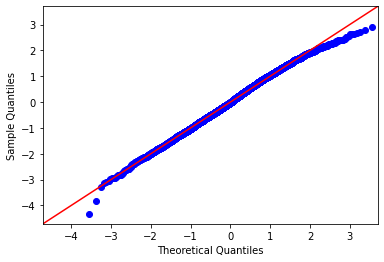

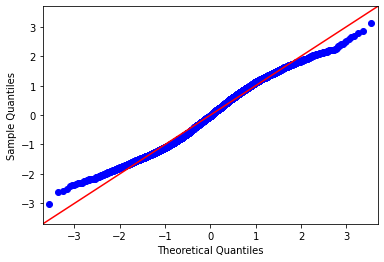

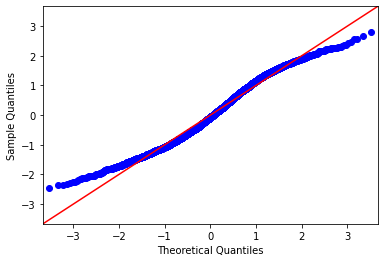

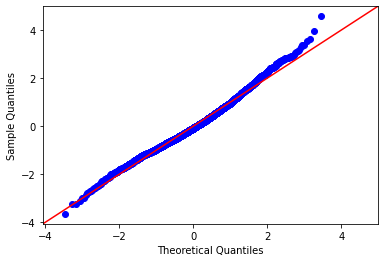

In [41]:
lowtier = kc_data[(kc_data.price > 210000) & (kc_data.price<=348000) ]
midtier = kc_data[(kc_data.price > 348000) & (kc_data.price<=480000) ]
uppermidtier = kc_data[(kc_data.price > 480000) & (kc_data.price<=664000) ]
hightier = kc_data[(kc_data.price >664000) & (kc_data.price<=1080000)]

lowincome = ['bedrooms', 'bathrooms', 'floors', 'lat', 'long', 
             'sqft_living15',  'sqft_total', 'sqft_habitable', 
             'poor', 'okay', 'good', 'great', 
             'view1', 'view2', 'view3', 
             'D','Cpl', 'Bmin', 'B', 
             'zip032t039', 'zip055t065', 'zip070t077', 'zip092t106', 
             'zip107t115', 'zip116t122', 'zip125t144', 'zip146t168',
             'thru80']


mediumincome = ['bathrooms', 'lat', 'long', 
                'sqft_living15', 'sqft_total', 'sqft_habitable',  
                'view2', 'Cpl', 'Bmin', 'B', 'Bpl', 
                'zip006t011', 'zip014t024', 'zip040t053', 
                'zip070t077', 'zip107t115', 'zip116t122', 
                'zip146t168', 'thru2000', 
                'thru2020', 'thru60', 'thru80']

uppermedincome = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 
                  'lat', 'long', 'sqft_living15', 'sqft_habitable', 
                  'D',  'Bmin', 'B', 'Bpl', 'Amin', 
                  'zip027t031', 'zip032t039', 'zip055t065',  
                  'zip125t144', 'zip146t168',  'thru2000', 
                  'thru2020', 'thru80', 'mi_5_scls']

highincome = ['bedrooms', 'bathrooms', 'waterfront', 'yr_renovated',
              'sqft_living15',
              'poor','good', 'great', 
              'Cmin','C', 'Cpl',  'B', 'Bpl', 'Amin', 
              'zip006t011', 'zip014t024', 'zip032t039', 'zip040t053', 
              'zip055t065', 'zip092t106', 'zip107t115', 'zip116t122', 
              'zip125t144', 'zip146t168', 'zip177t199', 'thru2000', 
              'thru2020', 'thru40', 'thru60', 'thru80', 
              'mi_nearest_scl',	'mi_3_scls', 'mi_5_scls']

def make_ols(df, x_columns, drops=None, target='price', add_constant=False):
    if drops:
        drops.append(target)
        X = df.drop(columns=drops)
    else:
        X = df[x_columns]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X)
    res = ols.fit()
    display(res.summary())
    fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)
    return res


make_ols(lowtier,lowincome)
make_ols(midtier,mediumincome)
make_ols(uppermidtier,uppermedincome)
make_ols(hightier,highincome)

## Train Split Test - High Tier

In [42]:
print(type(hightier))
kc_data.columns
highincome

<class 'pandas.core.frame.DataFrame'>


['bedrooms',
 'bathrooms',
 'waterfront',
 'yr_renovated',
 'sqft_living15',
 'poor',
 'good',
 'great',
 'Cmin',
 'C',
 'Cpl',
 'B',
 'Bpl',
 'Amin',
 'zip006t011',
 'zip014t024',
 'zip032t039',
 'zip040t053',
 'zip055t065',
 'zip092t106',
 'zip107t115',
 'zip116t122',
 'zip125t144',
 'zip146t168',
 'zip177t199',
 'thru2000',
 'thru2020',
 'thru40',
 'thru60',
 'thru80',
 'mi_nearest_scl',
 'mi_3_scls',
 'mi_5_scls']

In [70]:
y = hightier[['price']].copy()
X = hightier.drop(labels=['price','C', 'mi_nearest_scl',  'mi_3_scls', 'poor',  'okay',  'good',  'great' ], axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [80]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

2236 1492 2236 1492


In [81]:
print(X_train)

       bedrooms  bathrooms  floors  waterfront  view  yr_renovated      lat     long  sqft_living15  sqft_lot15  sqft_total  sqft_habitable  view1  view2  view3  view4  D  Cmin  Cpl  Bmin  B  Bpl  Amin  A  Apl  zip006t011  zip014t024  zip027t031  zip032t039  zip040t053  zip055t065  zip070t077  zip092t106  zip107t115  zip116t122  zip125t144  zip146t168  zip177t199  thru2000  thru2020  thru40  thru60  thru80  mi_5_scls
9262          4       2.75     1.0         0.0   2.0             0  47.7004 -122.229           2900       15720    51625800       2015401.0      0      1      0      0  0     0    0     0  1    0     0  0    0           0           0           0           1           0           0           0           0           0           0           0           0           0         1         0       0       0       0   5.485365
6017          4       2.50     1.0         0.0   3.0             0  47.4090 -122.333           2340       17357    31555500       2207271.0      0      0     

In [82]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [83]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [84]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    8.040866e+09
dtype: float64
Test Mean Squarred Error: price    8.637711e+09
dtype: float64


In [85]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 8040865725.291665
Test Mean Squarred Error: 8637710993.697395


In [86]:
linreg.score(X_test, y_test)

0.2539174491769217

## Train Split Test - Medium Tier

In [ ]:
y = midtier[['price']]
X = midtier.drop(['price'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
print(X_train)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('Diff:', test_mse-train_mse)


In [ ]:
linreg.score(X_test, y_test)

## Train Split Test - Low Tier

In [ ]:
y = lowtier[['price']]
X = lowtier.drop(['price'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
print(X_train)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
linreg.score(X_test, y_test)

In [ ]:
x_cols =['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sqft_total', 'sqft_habitable',
       'con2', 'con3', 'con4', 'con5', 'view1', 'view2', 'view3', 'view4',
       'grd4', 'grd5', 'grd6', 'grd7', 'grd8', 'grd9', 'grd10', 'grd11',
       'grd12', 'grd13']

In [ ]:
X = kc_data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

# Interpret

In [ ]:
model.summary()

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
kc_data = kc_data.sort_values('coef', ascending=False)
kc_data.head(15)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='grade', y='price', data=df_renovated)
ax.set(title='Grade relationship on Price', 
       xlabel='Grade', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='bathrooms', y='price', data=df_renovated)
ax.set(title='Bathrooms & Price', 
       xlabel='Bathrooms', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='bedrooms', y='price', data=df_renovated)
ax.set(title='Bedrooms & Price', 
       xlabel='Bedrooms', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='floors', y='price', data=df_renovated)
ax.set(title='Floors & Price', 
       xlabel='Floors', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='condition', y='price', data=df_renovated)
ax.set(title='Condition & Price', 
       xlabel='Condition', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(x='sqft_living', y='price', data=df_renovated)
ax.set(title='Square Feet Living Space & Price', 
       xlabel='SqFt.', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(x='sqft_above', y='price', data=df_renovated)
ax.set(title='Square Feet Above & Price', 
       xlabel='Sqft. Above', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='yr_built', y='price', data=df_renovated)
ax.set(title='Year Built & Price', 
       xlabel='Year Built', ylabel='Price')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='yr_renovated', y='price', data=df_renovated)
ax.set(title='Year Renovated & Price', 
       xlabel='Year', ylabel='Price')

fig.tight_layout()

In [ ]:
df_renovated=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_renovated['pairs'] = list(zip(df_renovated.level_0,df_renovated.level_1)
df_renovated.set_index(['pairs'], inplace = True)
df_renovated.drop(columns=['level_1','level_0'], inplace = True)
df_renovated.columns = ['cc']
df.drop_ducplicates(inplace=True)

In [ ]:
df_renovated[(df.cc>.75) & (df.cc <1)]

# Conclusions & Recommendations

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


X = kc_data.drop('price', axis=1)
y = kc_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ols1 = LinearRegression()
ols1.fit(X_train, y_train)

predprice = ols1.predict(y_train)

np.sqrt(mean_squared_error(X_train, predprice))

ols2 = LinearRegression()
ols_cv_mse = cross_val_score(ols2, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
ols_cv_mse.mean()


In [ ]:
mean_squared_error(y_train, predprice)